<table width="100%" border="3">
  <tbody>
    <tr>
      <td ><img src="https://aidea-web.tw/images/web/logo_white.png" alt="Aidea" width="400"/></td>
      <td align='left'><h1>Exercise 1: AIdea MBSH Project </h1></td>
    </tr>
  </tbody>
</table>


# AU AI Summer Programs 2020
* This tutorial uses the Mosquito Breeding Site Hunting problem dataset of the AIdea platform.
* This notebook program can be executed in the cloud using Google Colab or Jupyter on a personal computer.

AUAI Summer Mosquito Breeding Site Hunting problem Project


Pro.Hsueh-Ting Chu EMAIL: htchu.taiwan@gmail.com  FB: https://www.facebook.com/htchu.taiwan

# Exercise 1: AIdea Mosquito Breeding Site Hunting

# (A) AIdea dataset


## Step 1: Load the training data of the AIdea Mosquito Breeding Site Hunting dataset from google drive

In [1]:
from google_drive_downloader import GoogleDriveDownloader
GoogleDriveDownloader.download_file_from_google_drive(file_id='1Rp2E8qpaI520EuCiBcFS33DC0-jjR_V1',dest_path='./content', unzip=True)

Unzipping...Done.


## Step 2: read images of the training set

In [37]:
import glob
listImg = sorted(glob.glob('train_cdc/train_images/*.jpg'))
print(len(listImg))

2671


In [38]:
print(listImg)

['train_cdc/train_images/200801095.jpg', 'train_cdc/train_images/200801097.jpg', 'train_cdc/train_images/200801099.jpg', 'train_cdc/train_images/20080110.jpg', 'train_cdc/train_images/20080124.jpg', 'train_cdc/train_images/200803071.jpg', 'train_cdc/train_images/200803075.jpg', 'train_cdc/train_images/20080324.jpg', 'train_cdc/train_images/200804251.jpg', 'train_cdc/train_images/200804252.jpg', 'train_cdc/train_images/20080428.jpg', 'train_cdc/train_images/2008043017.jpg', 'train_cdc/train_images/20080501.jpg', 'train_cdc/train_images/20080506.jpg', 'train_cdc/train_images/200805191.jpg', 'train_cdc/train_images/20080520.jpg', 'train_cdc/train_images/200807183.jpg', 'train_cdc/train_images/200807184.jpg', 'train_cdc/train_images/200807185.jpg', 'train_cdc/train_images/200807251.jpg', 'train_cdc/train_images/2008072512.jpg', 'train_cdc/train_images/2008072513.jpg', 'train_cdc/train_images/200807255.jpg', 'train_cdc/train_images/200807258.jpg', 'train_cdc/train_images/200808111.jpg', 'tr

## Step 3: show images of the training set

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
start = 0

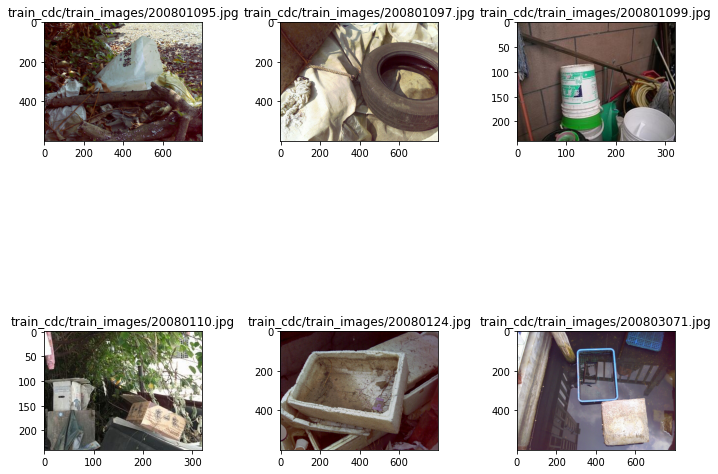

In [46]:
from tensorflow.keras.preprocessing import image
images = [image.load_img(file) for file in listImg[start:start+6]]

sel = 0
fig,ax=plt.subplots(2, 3)
fig.set_size_inches(10,10)
for i in range(2):
    for j in range (3):
        ax[i,j].imshow(images[sel])
        ax[i,j].set_title(listImg[start+sel])
        sel += 1
start += 6       
plt.tight_layout()

## Step 4: read annotations of the image

In [47]:
import glob
listXml = sorted(glob.glob('train_cdc/train_annotations/*.xml'))
print(listXml)

['train_cdc/train_annotations/200801095.xml', 'train_cdc/train_annotations/200801097.xml', 'train_cdc/train_annotations/200801099.xml', 'train_cdc/train_annotations/20080110.xml', 'train_cdc/train_annotations/20080124.xml', 'train_cdc/train_annotations/200803071.xml', 'train_cdc/train_annotations/200803075.xml', 'train_cdc/train_annotations/20080324.xml', 'train_cdc/train_annotations/200804251.xml', 'train_cdc/train_annotations/200804252.xml', 'train_cdc/train_annotations/20080428.xml', 'train_cdc/train_annotations/2008043017.xml', 'train_cdc/train_annotations/20080501.xml', 'train_cdc/train_annotations/20080506.xml', 'train_cdc/train_annotations/200805191.xml', 'train_cdc/train_annotations/20080520.xml', 'train_cdc/train_annotations/200807183.xml', 'train_cdc/train_annotations/200807184.xml', 'train_cdc/train_annotations/200807185.xml', 'train_cdc/train_annotations/200807251.xml', 'train_cdc/train_annotations/2008072512.xml', 'train_cdc/train_annotations/2008072513.xml', 'train_cdc/tr

In [48]:
start2 = 0
import xml.etree.ElementTree as ET

In [49]:
print(listXml[start2])

train_cdc/train_annotations/200801095.xml


In [63]:
list_with_all_boxes = []
tree = ET.parse(listXml[start2])
root = tree.getroot()
for obj in root.iter('object'):
    xml_box = obj.find('bndbox')
    xmin = (float(xml_box.find('xmin').text) - 1)
    ymin = (float(xml_box.find('ymin').text) - 1)
    xmax = (float(xml_box.find('xmax').text) - 1)
    ymax = (float(xml_box.find('ymax').text) - 1)
    list_with_all_boxes.append([xmin, ymin, xmax, ymax])
print(list_with_all_boxes)

[[14.0, 98.0, 76.0, 162.0], [163.0, 139.0, 290.0, 222.0]]


## Step 5: show annotated image: 

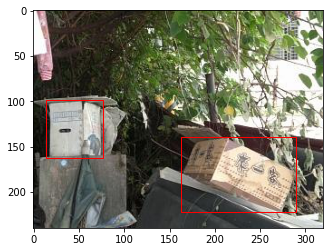

In [64]:
import matplotlib.patches as patches
import numpy as np
im = np.array(image.load_img(listImg[start2]), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)
for [xmin, ymin, xmax, ymax] in list_with_all_boxes:
  # Create a Rectangle patch
  rect = patches.Rectangle((xmin,ymin),xmax - xmin,ymax - ymin, linewidth=1,edgecolor='r',facecolor='none')
  # Add the patch to the Axes
  ax.add_patch(rect)  


plt.show()

In [62]:
start2 += 1